## Linear Regression

**Linear Regression** is a statistical model used to predict the relationship between a dependent variable and one or more independent variables.  
The case of one independent variable is called simple linear regression. For more than one independent variable, the process is called multiple linear regression.

<br>
**simple linear regression:**  
   
>$$Y_{pred} = (w_1 * x_1) + b$$  
where, *Ypred* is the dependent variable (predicted by the model)  
             *x1* is the independent variable  
            *w1* and *b* are the model parameters  
      
 <br>
**multiple linear regression:**  
 >$$Y_{pred} = (w_1 * x_1) + (w_2 * x_2) + (w_3 * x_3) + ..... + (w_n * x_n) + b$$  
  where, *Ypred* is the dependent variable (predicted by the model)  
         *x1, x2, x3,..., xn* are the independent variables  
         *w1, w2, w3,..., wn* and *b* are the model parameters  

<br>
**Cost function:**  
>  We can measure the accuracy of our linear regression model using the mean squared error (mse) cost function. MSE measures the average squared distance between the predicted output and the actual output.  
 $$ MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - Y_{pred})^2$$
 where, *Yi * is the expected value  
 *Ypred* is the value predicted by the model  
 *n* is the number os samples

<br>
**Finding best fit line:**  
>We can find best fit line using least square method.  
**Least Squares Method:** The best fit is done by making sure that the sum of squares of all the distances between the predicted value and the actual observations at each point is as small as possible.  
Let's consider simple linear regression to demonstrate the process.
$$Y_{pred} = (w_1 * x_1) + b$$
and,
 $$ MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - Y_{pred})^2$$
 $$ = \frac{1}{n}\sum_{i=1}^{n}(Y_i - [w_1*x_1 + b])^2$$
 here we want to minimize the error as much as possible, for that take the partial derivative with respect to variables (which are parameters w1 and b) and equate them to zero, we will get 2 equations with 2 unknowns. solve for them and we will get the optimal parameter values.  
 here we will have,  
  $$w_1 = \frac{\overline{xy} - \overline{x}.\overline{y}}{\overline{x^2} - (\overline{x})^2} = \frac{cov(x,y)}{var(x)}$$
  
  $$b = \overline{y} - (w_1*\overline{x})$$
  
  *the same can be done for multiple linear regression too.*

<br>
**Metrics for model evaluation:**
>**R-square value:**  
It determines how much of the total variation in dependent variable is explained by the variation in independent variables. Mathematically, it can be written as:  
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(Y_i - Y_{pred})^2}{\sum_{i=1}^{n}(Y_i - Y_{mean})^2}$$
The value of R-square is always between 0 and 1, where 0 means that the model does not explain any variability in the target variable and 1 meaning it explains full variability in the target variable.

<br>
**Assumptions of the model:**  
>1. The Regression model is linear in its parameters  
2. Independent variables should not be perfectly correlated with each other (No Multicollinearity).  
    Multicollinearity can be checked using Variance Inflation factor(VIF)
3. Mean of the residuals should be Zero
4. Residuals should not be correlated with the independent variables
5. Standard Deviation of the residuals should be constant (Homoscedasticity)
6. Residuals should not be correlated with each other

<br>
**2 important factors:**  
>1. which variables in particular are the significant predictors of the outcome variable ? --> try forward or backward variable elimination, look out for p values, try regulirizations (Ridge=L2, Lasso=L1, Elastic Net)
2. how signifcant is the regression line to make predictions with highest possible accuracy ? --> use r-square and mse

## Use case implementation of Linear Regression##

We will build a model to predict the price of a house given the features like - number of bedrooms, bathrooms, area (in sqft), floors, condition, zipcode, etc.

Let's get started...

In [33]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
# import the dataset and extract independent and dependent variables
data = pd.read_csv('house_data.csv')
data.drop(['id', 'date'], axis=1, inplace=True)

# min-max normalization
# data = 1000 * (data - data.min())/(data.max() - data.min())

x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Now let's explore more on the given data using data visualization techniques.

In [35]:
# get data description
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


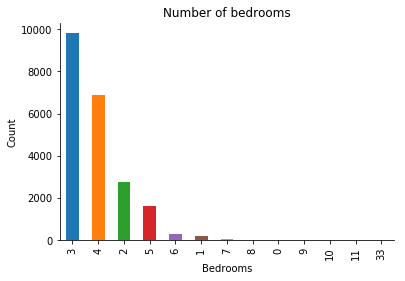

In [56]:
# for checking specific data value - Number of bedrooms
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.plot()
sns.despine()

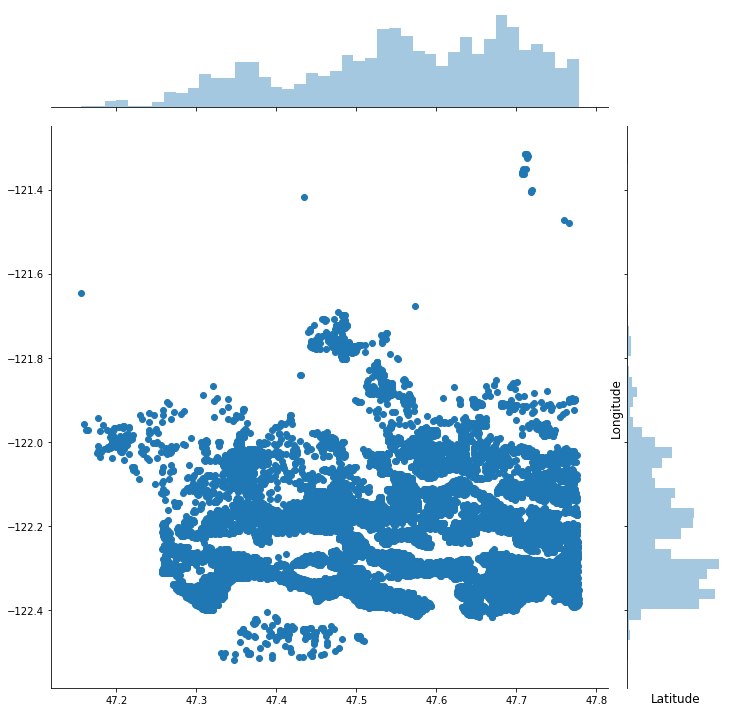

In [43]:
# joint-plot to get distribution
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine()

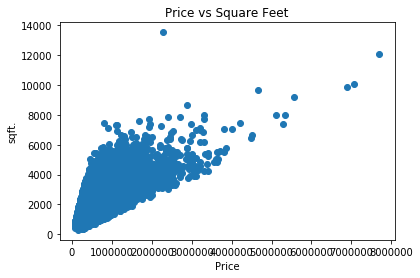

In [44]:
# scatter plot to check price vs sqft
plt.scatter(data.price, data.sqft_living)
plt.title('Price vs Square Feet')
plt.xlabel('Price')
plt.ylabel('sqft.')
plt.show()
sns.despine()

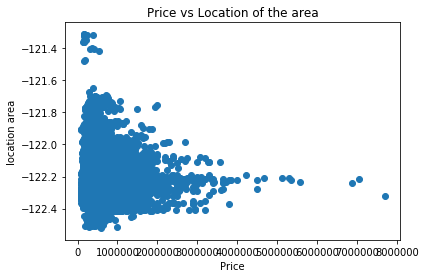

In [45]:
# scatter plot to check price vs location area
plt.scatter(data.price, data.long)
plt.title('Price vs Location of the area')
plt.xlabel('Price')
plt.ylabel('location area')
plt.show()
sns.despine()

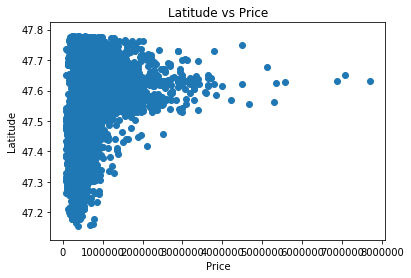

In [46]:
# scatter plot to check price vs latitude
plt.scatter(data.price, data.lat)
plt.title('Price vs Latitude')
plt.xlabel('Price')
plt.ylabel('Latitude')
plt.show()
sns.despine()

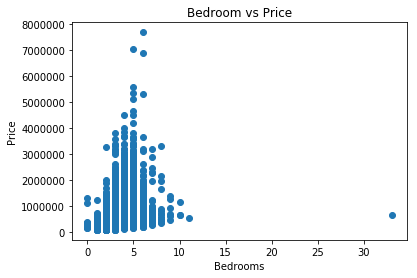

In [47]:
# scatter plot to check number of bedrooms vs price
plt.scatter(data.bedrooms,data.price)
plt.title('Bedroom vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
sns.despine()

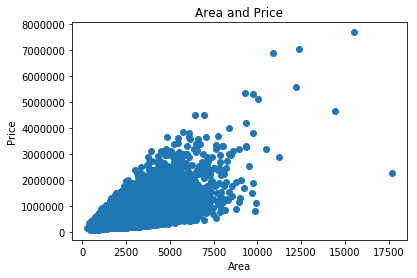

In [48]:
# scatter plot to check area vs price
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()
sns.despine()

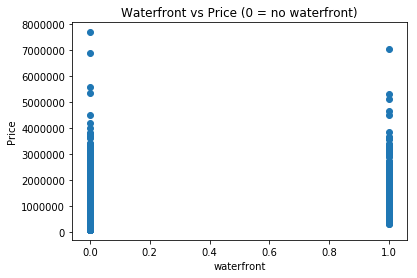

In [49]:
# scatter plot to waterfront vs check price
plt.scatter(data.waterfront,data.price)
plt.title('Waterfront vs Price (0 = no waterfront)')
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.show()
sns.despine()

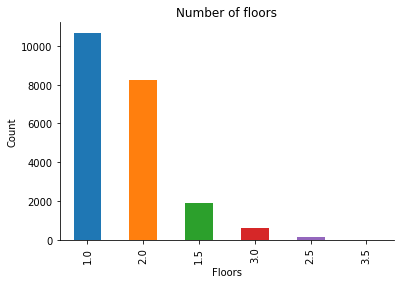

In [57]:
# for checking specific data value - floor
data.floors.value_counts().plot(kind='bar')
plt.title('Number of floors')
plt.xlabel('Floors')
plt.ylabel('Count')
sns.despine()

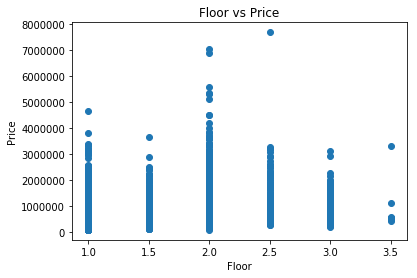

In [50]:
# scatter plot to check floor vs price
plt.scatter(data.floors, data.price)
plt.title('Floor vs Price')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()
sns.despine()

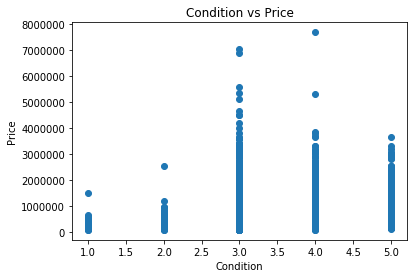

In [58]:
# scatter plot to check condition vs price
plt.scatter(data.condition, data.price)
plt.title('Condition vs Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()
sns.despine()

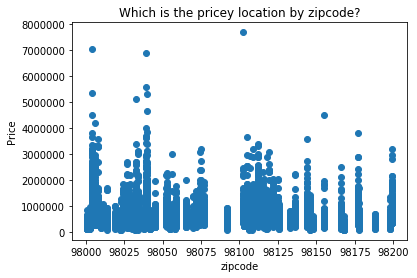

In [52]:
# scatter plot to check zipcode vs price
plt.scatter(data.zipcode, data.price)
plt.title("Which is the pricey location by zipcode?")
plt.xlabel('zipcode')
plt.ylabel('Price')
plt.show()
sns.despine()

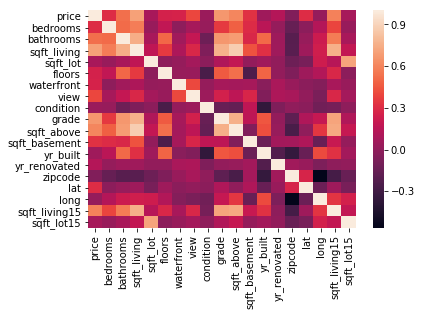

In [4]:
# Build  the correlation matrix
sns.heatmap(data.corr())

In [5]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (17290, 18)
x_test shape : (4323, 18)
y_train shape : (17290,)
y_test shape : (4323,)


In [6]:
# Fitting Multiple Linear Regression model using train data
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# prediction using test set
predictions = regressor.predict(x_test)
print(predictions)

[  39.7467462   192.07966987   61.54820173 ...,   37.28985892   17.26874613
   46.97880064]


In [8]:
# let's check how good is the model using test data 
from sklearn.metrics import r2_score

print('r2_score :', r2_score(y_test, predictions))
print('mse :', np.mean((predictions-y_test)**2))

r2_score : 0.69495547462
mse : 623.956094103


In [9]:
# print the coefficients and intercept of the model
print(regressor.coef_)
print(regressor.intercept_)

[ -1.50264824e-01   4.12273584e-02  -1.22038868e+11   3.81392685e-02
   2.43361719e-03   7.93788784e-02   2.76807533e-02   1.37120837e-02
   1.47297628e-01   8.39995830e+10   4.43945165e+10  -3.93437588e-02
   5.29639630e-03  -1.47428935e-02   4.93205510e-02  -3.51098024e-02
   1.84591224e-02  -5.33900037e-02]
-67.4557358456


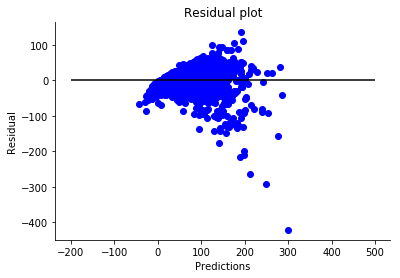

In [61]:
# Residual plot
x_plot = plt.scatter(predictions, (predictions - y_test), c='b')
plt.hlines(y=0, xmin= -200, xmax=500)
plt.title('Residual plot')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.plot()
sns.despine()

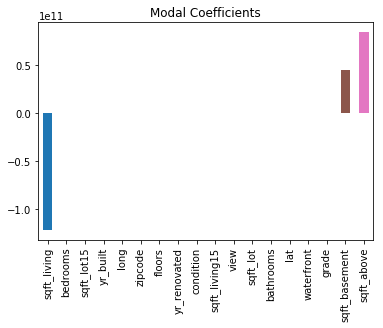

In [11]:
# plot coeff values
coef = pd.Series(regressor.coef_, data.columns[1:]).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [54]:
# Use Gradient Boosting Regressor to get better prediction
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5,
                                         min_samples_split = 2, learning_rate = 0.1,
                                         loss = 'ls')

In [55]:
# fit the model using training data
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [32]:
# Check for the score of the model
gbr.score(x_test,y_test)

0.90135959705703916